In [1]:
# import dependencies
from api_keys import alpha_vantage_api_key
from datetime import datetime, timedelta
import pprint as pp
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
# declare date to end analysis at
day_end = '2023/05/9'

Get API data and put it in json

In [3]:
# declare codes of tickers used for the manufacturers
codes = ["AAPL", "MSI", "GOOG", "GOOGL"]
manufacturers = ["apple", "motorola", "google_class_c", "google_class_a"]

# declare dates and closing_vals
dates = []
closing_vals = []

# create dataframe dictionary
dfs = {}

# initialize counter
counter = 0

# set number of days to go back
num_days = 1825

# main for loop that loops through the ticker codes
for code in codes:
    # get jsons
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={code}&outputsize=full&apikey={alpha_vantage_api_key}'
    response = requests.get(url)
    data_json = response.json()
    current_day = datetime.strptime(day_end,'%Y/%m/%d')
    
    for i in range(num_days):
        try:
            current_day_str = current_day.strftime('%Y-%m-%d')
        
            closing_vals.append(float(data_json["Time Series (Daily)"]
                                    [current_day_str]["5. adjusted close"]))
            dates.append(current_day)
        except:
            pass
        current_day = current_day - timedelta(days=1)
    
    data_dict = {
    "Date" : dates,
    "Adjusted Close" : closing_vals
    }
    
    data_df = pd.DataFrame(data_dict)
    
    data_df.sort_values(by='Date', inplace = True)
    
    dfs[f"{manufacturers[counter]}_df"] = data_df
    
    dates.clear()
    closing_vals.clear()
    data_dict = data_dict.clear()
    counter = counter + 1
    
    

In [4]:
apple_df = dfs["apple_df"]
apple_df.to_csv("resources/apple_closing.csv")
apple_df

,Date,Adjusted Close
1256,2018-05-11,45.116563
1255,2018-05-14,45.011301
1254,2018-05-15,44.602216
1253,2018-05-16,45.018478
1252,2018-05-17,44.733793
...,...,...
4,2023-05-03,167.450000
3,2023-05-04,165.790000
2,2023-05-05,173.570000
1,2023-05-08,173.500000


In [5]:
motorola_df = dfs["motorola_df"]
motorola_df.to_csv('resources/motorola_closing.csv')
motorola_df

,Date,Adjusted Close
1256,2018-05-11,100.426977
1255,2018-05-14,99.509540
1254,2018-05-15,100.065562
1253,2018-05-16,99.435403
1252,2018-05-17,98.462364
...,...,...
4,2023-05-03,288.620000
3,2023-05-04,290.410000
2,2023-05-05,281.560000
1,2023-05-08,284.900000


In [6]:
google_class_c_df = dfs["google_class_c_df"]
google_class_c_df.to_csv("resources/google_class_c_closing.csv")
google_class_c_df

,Date,Adjusted Close
1256,2018-05-11,54.9130
1255,2018-05-14,55.0100
1254,2018-05-15,53.9615
1253,2018-05-16,54.0885
1252,2018-05-17,53.9295
...,...,...
4,2023-05-03,106.1200
3,2023-05-04,105.2100
2,2023-05-05,106.2150
1,2023-05-08,108.2400


In [7]:
google_class_a_df = dfs["google_class_a_df"]
google_class_a_df.to_csv("resources/google_class_a_closing.csv")
google_class_a_df

,Date,Adjusted Close
1256,2018-05-11,55.1690
1255,2018-05-14,55.3300
1254,2018-05-15,54.2435
1253,2018-05-16,54.2045
1252,2018-05-17,54.0630
...,...,...
4,2023-05-03,105.4100
3,2023-05-04,104.6900
2,2023-05-05,105.5700
1,2023-05-08,107.7700


<AxesSubplot:xlabel='Date'>

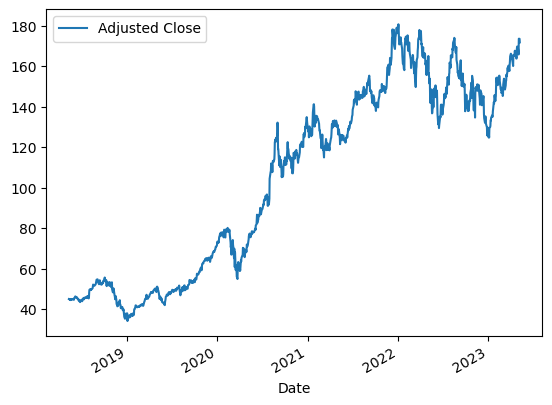

In [9]:
#plot close price
apple_df.plot("Date", "Adjusted Close")